In [1]:
import numpy as np
import pandas as pd
import plotly.express as px

# Import Data

In [2]:
movie_df = pd.read_csv('dataset/ml-lastest-small/movies.csv')
movie_df

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [3]:
rating_df = pd.read_csv('dataset/ml-lastest-small/ratings.csv')
rating_df

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


# Genres

In [4]:
genre_df = movie_df['genres'].str.get_dummies('|')
genre_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9738,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
9739,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
9740,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:title={'center':'Overall number of movie in each genre'}>

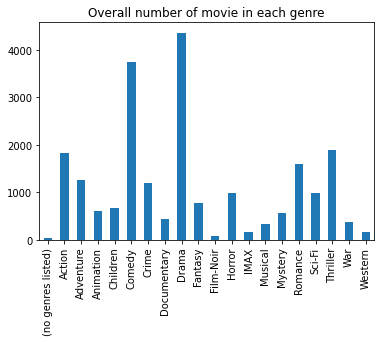

In [5]:
genre_df.sum(axis=0).plot.bar(title='Overall number of movie in each genre')

# Rating

Text(0.5, 1.0, 'Histogram of rating')

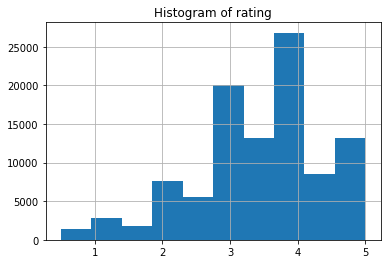

In [6]:
ax = rating_df['rating'].hist()
ax.set_title('Histogram of rating')

In [9]:
movie_rating_count_df = rating_df.groupby(by='movieId').agg(rating_count=('userId', 'count')).reset_index()
movie_rating_count_df

,movieId,rating_count
0,1,215
1,2,110
2,3,52
3,4,7
4,5,49
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [12]:
px.histogram(movie_rating_count_df, x='rating_count', title='Histogram of Rating count of each movie')

In [15]:
movie_rating_avg_df = rating_df.groupby(by='movieId').agg(avg_rating=('rating', 'mean')).reset_index()
movie_rating_avg_df

,movieId,avg_rating
0,1,3.920930
1,2,3.431818
2,3,3.259615
3,4,2.357143
4,5,3.071429
...,...,...
9719,193581,4.000000
9720,193583,3.500000
9721,193585,3.500000
9722,193587,3.500000


In [17]:
px.histogram(movie_rating_avg_df, x='avg_rating', title='Histogram of average rating per movie')